## AP & AR

In [3]:
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
with open('history/AP&AR_02_23.txt', 'r') as f:
    lines = f.readlines()

data = []

for line in lines:
    d = {}
    line = line.strip()
    line = re.split(r'[@|||=|(|)]', line)

#     print(line)
#     for item in line:
#         item = item.strip()
#         if ':' in item:
#             key, val = item.split(':')
#             d[key.strip()] = val.strip()

    data.append(line)

df = pd.DataFrame(data)

#df

In [26]:
del df[7]
del df[5]
del df[3]
del df[2]
del df[0]

In [27]:
df.columns = ['Metric', 'IoU', 'area', 'maxDets','score']

In [28]:
df['maxDets'] = df['maxDets'].str.replace(']', '')

/tmp/ipykernel_154/1116443662.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['maxDets'] = df['maxDets'].str.replace(']', '')


In [38]:
#df

### AP

In [21]:
# .csv 파일을 데이터프레임으로 불러오기
#df = pd.read_csv('history/df_ap.csv')
#df

,Unnamed: 0,ap_01,ap_02,ap_03,ap_04,ap_05,ap_06
0,0,0.2,0.9,0.0,0.0,0.1,0.2
1,1,0.6,2.9,0.0,0.0,0.5,0.6
2,2,1.4,5.5,0.2,0.0,0.8,1.6
3,3,1.4,4.9,0.2,0.1,0.8,1.3
4,4,1.5,5.1,0.3,0.0,0.8,1.5
...,...,...,...,...,...,...,...
200,200,19.8,38.2,19.0,3.3,14.8,25.3
201,201,19.3,37.7,18.0,2.7,14.4,25.9
202,202,19.3,37.3,18.6,2.7,15.4,25.4
203,203,20.0,38.1,19.1,2.8,16.3,26.1


In [29]:
# .txt 파일 불러왔을 때 사용
df_ap = df.groupby('Metric').get_group('AP')
ap_list = df_ap['score'].astype(float).tolist()
ap_list = [float(i*100) for i in ap_list]

In [22]:
# ap_1 : IoU=0.50:0.95 + area=all + maxDets=100 = AP
# ap_2 : IoU=0.50 + area=all + maxDets=100 = AP50
# ap_3 : IoU=0.75 + area=all + maxDets=100 = AP75
# ap_4 : IoU=0.50:0.95 + area=small + maxDets=100 = APs
# ap_5 : IoU=0.50:0.95 + area=medium + maxDets=100 = APm
# ap_6 : IoU=0.50:0.95 + area=large + maxDets=100 = APl

# 처음 불러왔을 때 사용
#ap_01 = []
#ap_02 = []
#ap_03 = []
#ap_04 = []
#ap_05 = []
#ap_06 = []

In [30]:
# .txt 파일 불러왔을 때 사용
ap_01 = ap_01 + ap_list[::6]
ap_02 = ap_02 + ap_list[1::6]
ap_03 = ap_03 + ap_list[2::6]
ap_04 = ap_04 + ap_list[3::6]
ap_05 = ap_05 + ap_list[4::6]
ap_06 = ap_06 + ap_list[5::6]

In [23]:
# .csv 파일 불러왔을 때 사용
#ap_01 = ap_01 + df['ap_01'].astype(float).tolist()
#ap_02 = ap_02 + df['ap_02'].astype(float).tolist()
#ap_03 = ap_03 + df['ap_03'].astype(float).tolist()
#ap_04 = ap_04 + df['ap_04'].astype(float).tolist()
#ap_05 = ap_05 + df['ap_05'].astype(float).tolist()
#ap_06 = ap_06 + df['ap_06'].astype(float).tolist()

In [31]:
len(ap_01)

230

In [32]:
# ap 저장 (리스트를 데이터프레임으로 만들기)
df_ap = pd.DataFrame({'ap_01': ap_01, 'ap_02': ap_02, 'ap_03': ap_03, 'ap_04': ap_04, 'ap_05': ap_05, 'ap_06': ap_06})
df_ap.to_csv('history/df_ap.csv', index=True)

In [12]:
iters = []

for i in range(1, len(ap_01)+1):
    i = i * 1000
    iters.append(i)

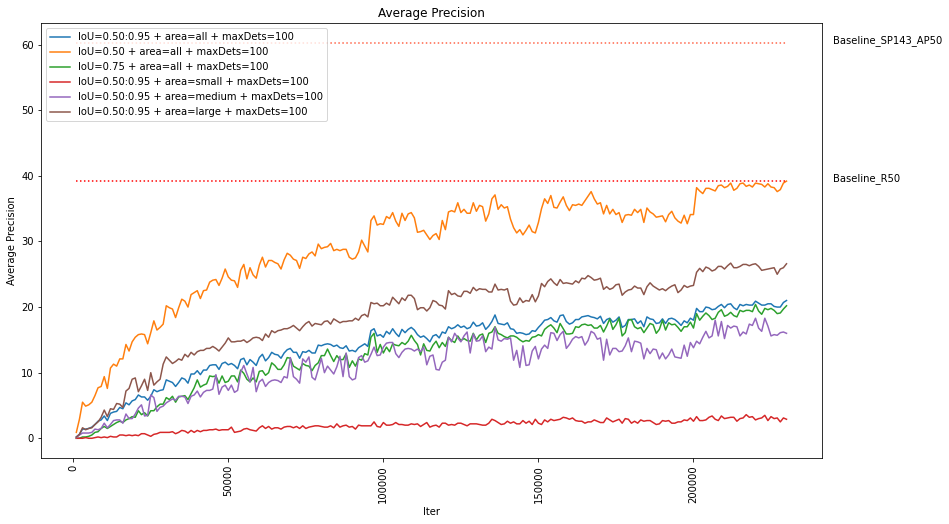

In [64]:
fig, ax = plt.subplots(figsize=(14, 8))

AP_IoU_SN143 = [60.26] * len(iters)
AP_IoU_R50 = [39.2] * len(iters)

# 그래프 그리기
plt.plot(iters, ap_01, label='IoU=0.50:0.95 + area=all + maxDets=100')
plt.plot(iters, ap_02, label='IoU=0.50 + area=all + maxDets=100')
plt.plot(iters, ap_03, label='IoU=0.75 + area=all + maxDets=100')
plt.plot(iters, ap_04, label='IoU=0.50:0.95 + area=small + maxDets=100')
plt.plot(iters, ap_05, label='IoU=0.50:0.95 + area=medium + maxDets=100')
plt.plot(iters, ap_06, label='IoU=0.50:0.95 + area=large + maxDets=100')

plt.plot(iters, AP_IoU_SN143, 'tomato', linestyle=':', label='baseline_SP143')
plt.plot(iters, AP_IoU_R50, 'r', linestyle=':', label='baseline_R50')

plt.xticks(rotation=90)  # x축 레이블 90도 회전
plt.xlabel('Iter')  # x축 레이블 설정
plt.ylabel('Average Precision')  # y축 레이블 설정
plt.title('Average Precision')
plt.legend(['IoU=0.50:0.95 + area=all + maxDets=100', 'IoU=0.50 + area=all + maxDets=100', 'IoU=0.75 + area=all + maxDets=100', \
           'IoU=0.50:0.95 + area=small + maxDets=100', 'IoU=0.50:0.95 + area=medium + maxDets=100', 'IoU=0.50:0.95 + area=large + maxDets=100'], \
          loc = 'upper left')
plt.annotate("Baseline_R50", xy=(240000, 39.2), xytext=(245000, 39.2))
plt.annotate("Baseline_SP143_AP50", xy=(240000, 60.26), xytext=(245000, 60.26))
plt.show()

### AR

In [10]:
# .csv 파일을 데이터프레임으로 불러오기
#df = pd.read_csv('history/df_ar.csv')
#df

,Unnamed: 0,ar_01,ar_02,ar_03,ar_04,ar_05,ar_06
0,0,0.6,1.5,1.8,0.0,0.3,2.1
1,1,2.1,3.8,3.9,0.2,1.0,4.3
2,2,4.0,6.8,7.1,0.3,1.6,8.0
3,3,2.7,3.7,3.7,0.4,1.6,3.4
4,4,2.9,3.9,3.9,0.3,1.7,3.7
...,...,...,...,...,...,...,...
200,200,32.9,40.5,40.5,8.8,32.1,44.6
201,201,32.8,39.2,39.3,8.2,30.7,44.4
202,202,32.6,39.0,39.1,7.8,29.1,43.8
203,203,33.1,40.8,40.9,8.0,32.0,44.9


In [35]:
# .txt 파일 불러왔을 때 사용
df_ar = df.groupby('Metric').get_group('AR')
ar_list = df_ar['score'].astype(float).tolist()
ar_list = [float(i*100) for i in ar_list]

In [11]:
# ar_1 : IoU=0.50:0.95 + area=all + maxDets= 1
# ar_2 : IoU=0.50:0.95 + area=all + maxDets=10
# ar_3 : IoU=0.50:0.95 + area=all + maxDets=100
# ar_4 : IoU=0.50:0.95 + area=small + maxDets=100
# ar_5 : IoU=0.50:0.95 + area=medium + maxDets=100
# ar_6 : IoU=0.50:0.95 + area=large + maxDets=100

# 처음 불러왔을 때 사용
#ar_01 = []
#ar_02 = []
#ar_03 = []
#ar_04 = []
#ar_05 = []
#ar_06 = []

In [36]:
# .txt 파일 불러왔을 때 사용
ar_01 = ar_01 + ar_list[::6]
ar_02 = ar_02 + ar_list[1::6]
ar_03 = ar_03 + ar_list[2::6]
ar_04 = ar_04 + ar_list[3::6]
ar_05 = ar_05 + ar_list[4::6]
ar_06 = ar_06 + ar_list[5::6]

In [12]:
# .csv 파일 불러왔을 때 사용
#ar_01 = ar_01 + df['ar_01'].astype(float).tolist()
#ar_02 = ar_02 + df['ar_02'].astype(float).tolist()
#ar_03 = ar_03 + df['ar_03'].astype(float).tolist()
#ar_04 = ar_04 + df['ar_04'].astype(float).tolist()
#ar_05 = ar_05 + df['ar_05'].astype(float).tolist()
#ar_06 = ar_06 + df['ar_06'].astype(float).tolist()

In [37]:
len(ar_01)

230

In [38]:
# ar 저장 (리스트를 데이터프레임으로 만들기)
df_ar = pd.DataFrame({'ar_01': ar_01, 'ar_02': ar_02, 'ar_03': ar_03, 'ar_04': ar_04, 'ar_05': ar_05, 'ar_06': ar_06})
df_ar.to_csv('history/df_ar.csv', index=True)

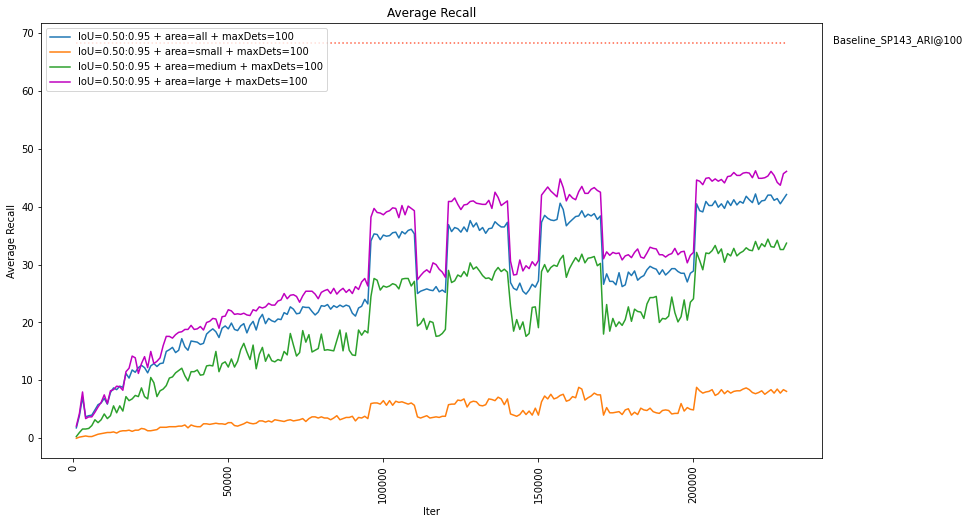

In [66]:
fig, ax = plt.subplots(figsize=(14, 8))

AR_IoU_SN143 = [68.28] * len(iters)

# 그래프 그리기
#plt.plot(iters, ar_01, label='IoU=0.50:0.95 + area=all + maxDets= 1')
#plt.plot(iters, ar_02, label='IoU=0.50:0.95 + area=all + maxDets=10')
plt.plot(iters, ar_03, label='IoU=0.50:0.95 + area=all + maxDets=100')
plt.plot(iters, ar_04, label='IoU=0.50:0.95 + area=small + maxDets=100')
plt.plot(iters, ar_05, label='IoU=0.50:0.95 + area=medium + maxDets=100')
plt.plot(iters, ar_06, 'm', label='IoU=0.50:0.95 + area=large + maxDets=100')

plt.plot(iters, AR_IoU_SN143, 'tomato', linestyle=':', label='baseline_SP143')

plt.xticks(rotation=90)  # x축 레이블 90도 회전
plt.xlabel('Iter')  # x축 레이블 설정
plt.ylabel('Average Recall')
plt.title('Average Recall')
plt.legend(['IoU=0.50:0.95 + area=all + maxDets=100', 'IoU=0.50:0.95 + area=small + maxDets=100', 'IoU=0.50:0.95 + area=medium + maxDets=100', \
           'IoU=0.50:0.95 + area=large + maxDets=100'], loc = 'upper left')
plt.annotate("Baseline_SP143_ARl@100", xy=(240000, 68.28), xytext=(245000, 68.28))
plt.show()

### class별 AP

In [4]:
# json 파일 불러오기
with open('history/class_02_23.json', 'r') as f:
    data = f.readlines()

# json 문자열을 dictionary로 변환
data = [json.loads(line) for line in data]

# 데이터프레임으로 변환
df = pd.DataFrame(data)

#df

In [5]:
#print(df.columns)

In [6]:
# .csv 파일을 데이터프레임으로 불러오기
df = pd.read_csv('history/df_class.csv')
df

,Unnamed: 0,"segm/AP-shirt, blouse","segm/AP-top, t-shirt, sweatshirt",segm/AP-sweater,segm/AP-cardigan,segm/AP-jacket,segm/AP-vest,segm/AP-pants,segm/AP-shorts,segm/AP-skirt,...,segm/AP-glasses,segm/AP-hat,"segm/AP-headband, head covering, hair accessory",segm/AP-tie,segm/AP-glove,segm/AP-belt,"segm/AP-tights, stockings",segm/AP-shoe,"segm/AP-bag, wallet",segm/AP-scarf
0,0,0.107565,0.682801,0.000000,0.000000,0.133660,0.000000,1.218108,0.000000,0.000000,...,0.066007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.322116,2.270417,0.000000,0.000000,0.345039,0.000000,1.758882,0.284717,2.769638,...,0.861743,0.000000,0.000000,0.000000,0.000000,0.000000,0.123762,0.241287,0.000000,0.000000
2,2,0.756508,5.691156,1.065827,0.000000,2.012343,0.000000,2.588188,1.324709,4.534591,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148653,2.358044,0.000000,0.000000
3,3,0.000000,4.998384,0.000000,0.000000,2.114117,0.000000,2.879208,0.024752,2.566391,...,2.699459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.422037,0.000000,0.000000
4,4,0.049505,6.206252,0.000000,0.000000,0.907230,0.000000,3.317595,0.497281,2.121929,...,2.926089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.966038,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,225,13.573288,30.648286,14.621524,0.626938,24.579810,2.087621,41.147934,36.725882,33.089285,...,44.754968,35.156297,5.207584,8.456703,5.026997,8.067350,26.640438,30.083522,14.273472,1.944772
226,226,12.986616,29.835698,14.313599,0.736829,23.151194,1.440172,41.726027,36.816049,31.084779,...,45.737342,34.579091,5.410731,9.868587,4.544901,7.095647,24.486857,28.774306,16.822862,1.790939
227,227,13.553208,31.113366,16.261516,1.208321,24.777397,2.545332,42.784967,36.904081,33.165615,...,44.503585,34.355691,5.198889,6.519917,3.951927,7.479391,24.933141,24.601473,14.553614,2.124591
228,228,13.123650,30.653565,17.754163,1.275593,25.204407,2.522504,43.713336,36.858582,33.096961,...,47.139105,35.534407,5.495575,8.792079,3.422610,6.639811,27.255074,29.504029,14.642987,3.342704


In [7]:
# 처음 불러올 때 사용
# shirt_list = []
# top_list = []
# sweater_list = []
# cardigan_list = []
# jacket_list = []
# vest_list = []
# pants_list = []
# shorts_list = []
# skirt_list = []
# coat_list = []
# dress_list = []
# jumpsuit_list = []
# glasses_list = []
# hat_list = []
# hair_accessory_list = []
# tie_list = []
# glove_list = []
# belt_list = []
# tights_list = []
# shoe_list = []
# bag_list = []
# scarf_list = []

In [8]:
shirt_list = shirt_list + df['segm/AP-shirt, blouse'].astype(float).tolist()

top_list = top_list + df['segm/AP-top, t-shirt, sweatshirt'].astype(float).tolist()

sweater_list = sweater_list + df['segm/AP-sweater'].astype(float).tolist()

cardigan_list = cardigan_list + df['segm/AP-cardigan'].astype(float).tolist()

jacket_list = jacket_list + df['segm/AP-jacket'].astype(float).tolist()

vest_list = vest_list + df['segm/AP-vest'].astype(float).tolist()

pants_list = pants_list + df['segm/AP-pants'].astype(float).tolist()

shorts_list = shorts_list + df['segm/AP-shorts'].astype(float).tolist()

skirt_list = skirt_list + df['segm/AP-skirt'].astype(float).tolist()

coat_list = coat_list + df['segm/AP-coat'].astype(float).tolist()

dress_list = dress_list + df['segm/AP-dress'].astype(float).tolist()

jumpsuit_list = jumpsuit_list + df['segm/AP-jumpsuit'].astype(float).tolist()

glasses_list = glasses_list + df['segm/AP-glasses'].astype(float).tolist()

hat_list = hat_list + df['segm/AP-hat'].astype(float).tolist()

hair_accessory_list = hair_accessory_list + df['segm/AP-headband, head covering, hair accessory'].astype(float).tolist()

tie_list = tie_list + df['segm/AP-tie'].astype(float).tolist()

glove_list = glove_list + df['segm/AP-glove'].astype(float).tolist()

belt_list = belt_list + df['segm/AP-belt'].astype(float).tolist()

tights_list = tights_list + df['segm/AP-tights, stockings'].astype(float).tolist()

shoe_list = shoe_list + df['segm/AP-shoe'].astype(float).tolist()

bag_list = bag_list + df['segm/AP-bag, wallet'].astype(float).tolist()

scarf_list = scarf_list + df['segm/AP-scarf'].astype(float).tolist()

In [9]:
len(scarf_list)

230

In [10]:
# ap class 저장 (리스트를 데이터프레임으로 만들기)
df_class = pd.DataFrame({'segm/AP-shirt, blouse': shirt_list, 'segm/AP-top, t-shirt, sweatshirt': top_list, \
                         'segm/AP-sweater': sweater_list, 'segm/AP-cardigan': cardigan_list, 'segm/AP-jacket': jacket_list, \
                        'segm/AP-vest': vest_list, 'segm/AP-pants': pants_list, 'segm/AP-shorts': shorts_list, \
                        'segm/AP-skirt': skirt_list, 'segm/AP-coat': coat_list, 'segm/AP-dress': dress_list, \
                        'segm/AP-jumpsuit': jumpsuit_list, 'segm/AP-glasses': glasses_list, 'segm/AP-hat': hat_list, \
                        'segm/AP-headband, head covering, hair accessory': hair_accessory_list, 'segm/AP-tie': tie_list, \
                        'segm/AP-glove': glove_list, 'segm/AP-belt': belt_list, 'segm/AP-tights, stockings': tights_list, \
                        'segm/AP-shoe': shoe_list, 'segm/AP-bag, wallet': bag_list, 'segm/AP-scarf': scarf_list})
df_class.to_csv('history/df_class.csv', index=True)

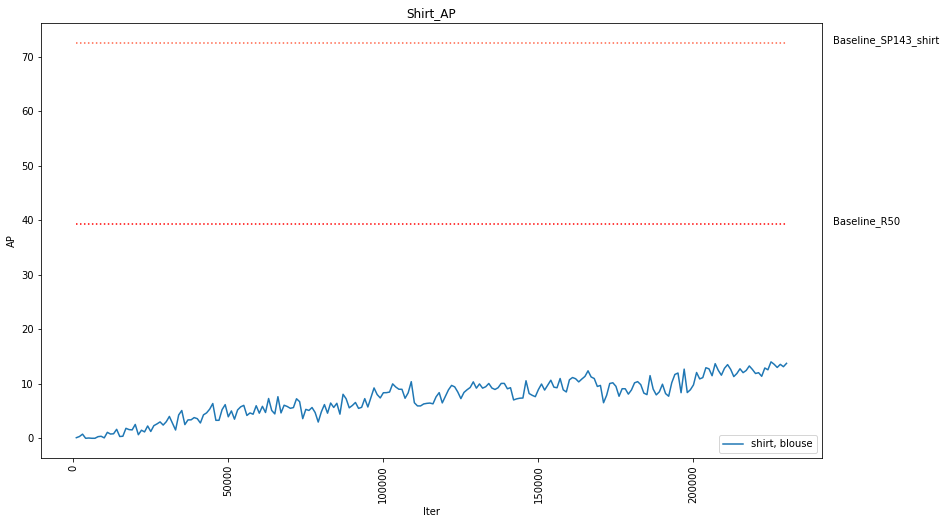

In [13]:
# shirt, blouse 그래프 그리기
shirt_IoU_SN143 = [72.49] * len(iters)
shirt_IoU_R50 = [39.2] * len(iters)

fig, ax = plt.subplots(figsize=(14, 8))

plt.plot(iters, shirt_list, label='shirt, blouse')

plt.plot(iters, shirt_IoU_SN143, 'tomato', linestyle=':', label='baseline_SP143')
plt.plot(iters, shirt_IoU_R50, 'r', linestyle=':', label='baseline_R50')

plt.xticks(rotation=90)  # x축 레이블 90도 회전
plt.xlabel('Iter')  # x축 레이블 설정
plt.ylabel('AP')
plt.title('Shirt_AP')
plt.legend(['shirt, blouse'], loc="lower right")
plt.annotate("Baseline_R50", xy=(240000, 39.2), xytext=(245000, 39.2))
plt.annotate("Baseline_SP143_shirt", xy=(240000, 72.49), xytext=(245000, 72.49))
plt.show()

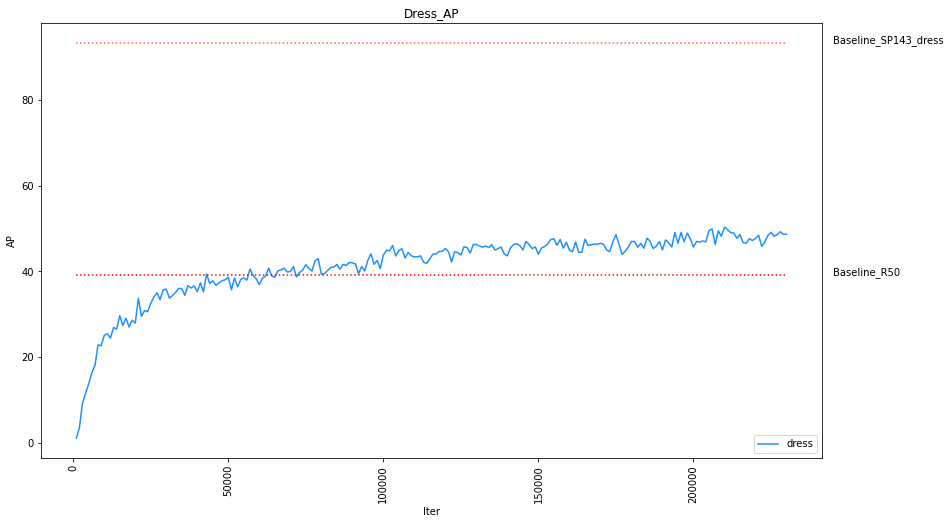

In [14]:
# dress 그래프 그리기
dress_IoU_SN143 = [93.30] * len(iters)
dress_IoU_R50 = [39.2] * len(iters)

fig, ax = plt.subplots(figsize=(14, 8))

plt.plot(iters, dress_list, 'dodgerblue', label='dress')

plt.plot(iters, dress_IoU_SN143, 'tomato', linestyle=':', label='baseline_SP143')
plt.plot(iters, dress_IoU_R50, 'r', linestyle=':', label='baseline_R50')

plt.xticks(rotation=90)  # x축 레이블 90도 회전
plt.xlabel('Iter')  # x축 레이블 설정
plt.ylabel('AP')
plt.title('Dress_AP')
plt.legend(['dress'])
plt.annotate("Baseline_R50", xy=(240000, 39.2), xytext=(245000, 39.2))
plt.annotate("Baseline_SP143_dress", xy=(240000, 93.30), xytext=(245000, 93.30))
plt.show()

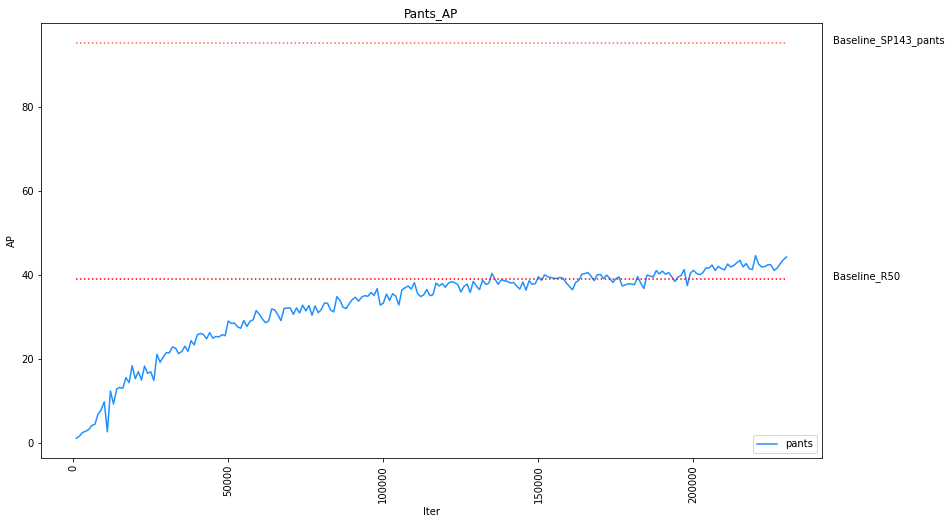

In [15]:
# pants 그래프 그리기
pants_IoU_SN143 = [95.29] * len(iters)
pants_IoU_R50 = [39.2] * len(iters)

fig, ax = plt.subplots(figsize=(14, 8))

plt.plot(iters, pants_list, 'dodgerblue', label='pants')

plt.plot(iters, pants_IoU_SN143, 'tomato', linestyle=':', label='baseline_SP143')
plt.plot(iters, pants_IoU_R50, 'r', linestyle=':', label='baseline_R50')

plt.xticks(rotation=90)  # x축 레이블 90도 회전
plt.xlabel('Iter')  # x축 레이블 설정
plt.ylabel('AP')
plt.title('Pants_AP')
plt.legend(['pants'])
plt.annotate("Baseline_R50", xy=(240000, 39.2), xytext=(245000, 39.2))
plt.annotate("Baseline_SP143_pants", xy=(240000, 95.29), xytext=(245000, 95.29))
plt.show()

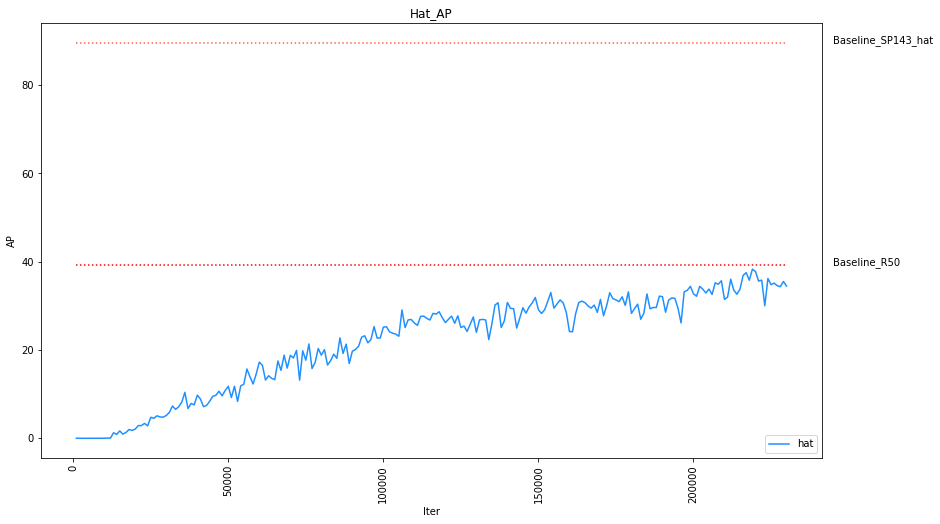

In [16]:
# hat 그래프 그리기
hat_IoU_SN143 = [89.58] * len(iters)
hat_IoU_R50 = [39.2] * len(iters)

fig, ax = plt.subplots(figsize=(14, 8))

plt.plot(iters, hat_list, 'dodgerblue', label='hat')

plt.plot(iters, hat_IoU_SN143, 'tomato', linestyle=':', label='baseline_SP143')
plt.plot(iters, hat_IoU_R50, 'r', linestyle=':', label='baseline_R50')

plt.xticks(rotation=90)  # x축 레이블 90도 회전
plt.xlabel('Iter')  # x축 레이블 설정
plt.ylabel('AP')
plt.title('Hat_AP')
plt.legend(['hat'])
plt.annotate("Baseline_R50", xy=(240000, 39.2), xytext=(245000, 39.2))
plt.annotate("Baseline_SP143_hat", xy=(240000, 89.58), xytext=(245000, 89.58))
plt.show()